### **About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



### **Business Problem/Objective**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



### **Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:
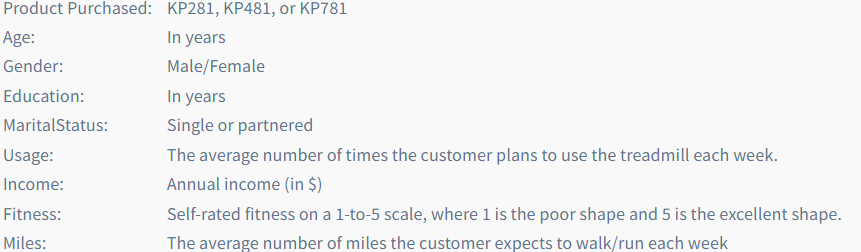

### **Product Portfolio:**


*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500.

## **Exploretory Data analysis**

In [80]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy

In [12]:
#sampling the data
df = pd.read_csv('/content/drive/MyDrive/aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [7]:
df.shape

(180, 9)

In [9]:
df.duplicated().value_counts()

,count
False,180


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**🔍Insights:**

*   180 records and 9 different attributes are present in the dataset.
*   No duplicates, null or missing values present in the dataset.


**Changing the datatype of categorical values like usage and fitness.**

In [83]:
df['Usage'] = df['Usage'].astype('str')
df['Fitness'] = df['Fitness'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    object  
 6   Fitness        180 non-null    object  
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  miles_group    180 non-null    category
dtypes: category(4), int64(4), object(5)
memory usage: 14.2+ KB


## **Statistical Summary**

In [13]:
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**🔍Insights:**
1. **Product** - Over the past three months, the KP281 product demonstrated the highest sales performance among the three products, accounting for approximately **44%** of total sales.

2. **Gender** - Based on the data of last 3 months, around **58%** of the buyers were Male and **42%** were female

3. **Marital Status** - Based on the data of last 3 months, around **59%** of the buyers were Married and **41%** were single

In [17]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


🔍 Insights
1. **Age** - The age range of customers spans from 18 to 50 year, with an average age of 29 years.

2. **Education** - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.

3. **Usage** - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

4. **Fitness** - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.

5. **Income** - The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.

6. **Miles** - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

## **Data understanding and Modification**

In [22]:
#checking unique value for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print(' ')

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
 
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
 
Unique Values in Gender column are :-
['Male' 'Female']
 
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
 
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
 
Unique Values in Usage column are :-
['3' '2' '4' '5' '6' '7']
 
Unique Values in Fitness column are :-
['4' '3' '2' '1' '5']
 
Unique Values in Income column are :-
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581 

### **Creating category buckets/bins for better analysis**

Age Column in 4 different buckets:
*  Young Adult: from 18 - 25
*  Adults: from 26 - 35
*  Middle Aged Adults: 36-45
*  Elder: 46 and above

In [23]:
age_bin_range = [17,25,35,45,float('inf')]
age_bin_labels = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = age_bin_range,labels = age_bin_labels)

Education Column in 3 different buckets:
*  Primary Education: upto 12
*  Secondary Education: 13 to 15
*  Higher Education: 16 and above

In [24]:
ed_bin_range = [0,12,15,float('inf')]
ed_bin_labels = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = ed_bin_range,labels = ed_bin_labels)

Income Column in 4 different buckets:
*  Low Income - Upto 40,000
*  Moderate Income - 40,000 to 60,000
*  High Income - 60,000 to 80,000
*  Very High Income - Above 80,000

In [25]:
incm_bin_range = [0,40000,60000,80000,float('inf')]
incm_bin_labels = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = incm_bin_range,labels = incm_bin_labels)

Mile Column in 4 different buckets:
*  Light Activity - Upto 50 miles
*  Moderate Activity - 51 to 100 miles
*  Active Lifestyle - 101 to 200 miles
*  Fitness Enthusiast - Above 200 miles

In [26]:
mile_bin_range = [0,50,100,200,float('inf')]
mile_bin_labels = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = mile_bin_range,labels = mile_bin_labels)

In [27]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


# **Visual Analysis - Univariate**

## **Categorical Variables**

### **Product Sales Distribution**

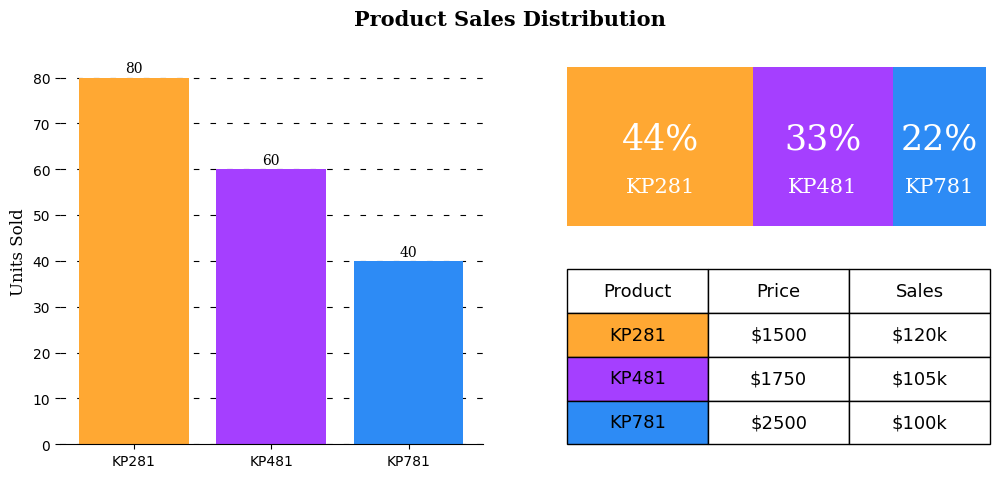

In [33]:
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(gs[:,0])
product_count = df['Product'].value_counts()
color_map = ["#ffa833", "#a53fff",'#2d8bf5']

ax0.bar(product_count.index,product_count.values,color = color_map,zorder = 2)


for i in product_count.index:
    ax0.text(i,product_count[i]+2,product_count[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')


ax0.grid(color = 'black',linestyle = '-', axis = 'y', zorder = 0, dashes = (5,10))
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)


ax0.set_ylabel('Units Sold',fontfamily='serif',fontsize = 12)

# product % sale

ax1 = fig.add_subplot(gs[0,1])

product_count['percent'] = ((product_count.values/df.shape[0])* 100).round()

ax1.barh(product_count.index[0],product_count.loc['percent'][0],color = "#ffa833")
ax1.barh(product_count.index[0],product_count.loc['percent'][1],left = product_count.loc['percent'][0],color = '#a53fff')
ax1.barh(product_count.index[0],product_count.loc['percent'][2],
         left = product_count.loc['percent'][0] + product_count.loc['percent'][1], color = '#2d8bf5')
ax1.set(xlim=(0,100))

product_count['info_percent'] =[product_count['percent'][0]/2,product_count['percent'][0] + product_count['percent'][1]/2,
                                 product_count['percent'][0] + product_count['percent'][1] + product_count['percent'][2]/2]
for i in range(3):
    ax1.text(product_count['info_percent'][i],0.04,f"{product_count['percent'][i]:.0f}%",
             va = 'center', ha='center',fontsize=25, fontweight='light', fontfamily='serif',color='white')

    ax1.text(product_count['info_percent'][i],-0.2,product_count.index[i],
             va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax1.axis('off')



# product portfolio
ax2 = fig.add_subplot(gs[1,1])

product_portfolio = [['KP281','$1500','$120k'],['KP481','$1750','$105k'],['KP781','$2500','$100k']]
color_2d = [['#ffa833','#FFFFFF','#FFFFFF'],['#a53fff','#FFFFFF','#FFFFFF'],['#2d8bf5','#FFFFFF','#FFFFFF']]

table = ax2.table(cellText = product_portfolio, cellColours=color_2d, cellLoc='center',colLabels =['Product','Price','Sales'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax2.axis('off')


#adding title to the visual
fig.suptitle('Product Sales Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔍Insights:**

The KP281 treadmill model, positioned as an entry-level product, has the highest number of units sold, trailed by the KP481 (mid-level) and KP781 (advanced) models.

All three models have nearly equal contributions in terms of sales with KP281 being the highest contributor.

### **Gender and Marital Status Disribution**

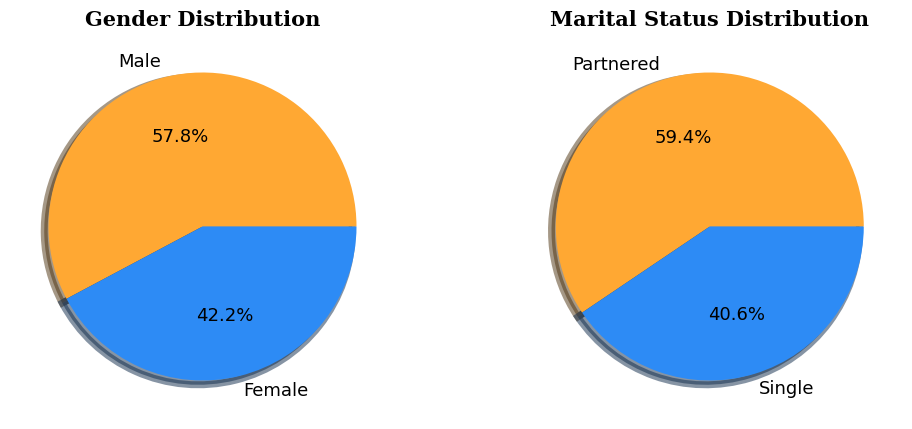

In [34]:
#setting the plot style
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(1,2)

#pie chart for gender disribution
ax0 = fig.add_subplot(gs[0,0])

color_map = ["#ffa833", "#2d8bf5"]
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

#pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])

color_map = ["#ffa833", "#2d8bf5"]
ax1.pie(df['MaritalStatus'].value_counts().values,labels = df['MaritalStatus'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### **Buyer Fitness and Treadmill Usage**

In [51]:
# Usage distribution
usage_counts = df['Usage'].value_counts()
usage_percentages = (usage_counts / len(df) * 100).round(2)

print("Usage Distribution:")
print(pd.DataFrame({'Count': usage_counts, 'Percentage': usage_percentages}))
print("\n")

# Fitness distribution
fitness_counts = df['Fitness'].value_counts()
fitness_percentages = (fitness_counts / len(df) * 100).round(2)

print("Fitness Distribution:")
print(pd.DataFrame({'Count': fitness_counts, 'Percentage': fitness_percentages}))

Usage Distribution:
       Count  Percentage
Usage                   
3         69       38.33
4         52       28.89
2         33       18.33
5         17        9.44
6          7        3.89
7          2        1.11


Fitness Distribution:
         Count  Percentage
Fitness                   
3           97       53.89
5           31       17.22
2           26       14.44
4           24       13.33
1            2        1.11


<ipython-input-46-ba97a546a38c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(temp.index,fontweight = 'bold')
<ipython-input-46-ba97a546a38c>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(temp.index,fontweight = 'bold')


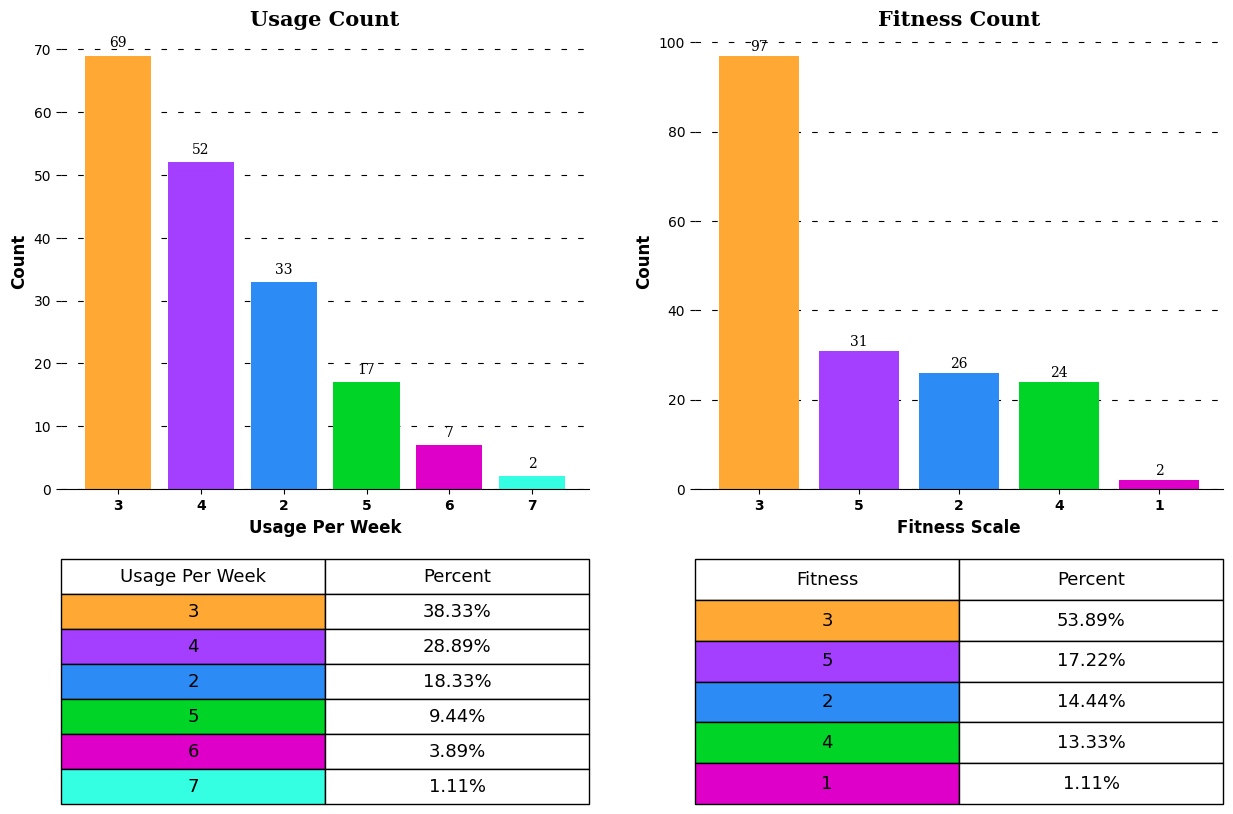

In [46]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35])

#bar chart for usage disribution
ax0 = fig.add_subplot(gs[0,0])
temp = df['Usage'].value_counts()
color_map = ["#ffa833", "#a53fff",'#2d8bf5','#00d527','#de00c9','#35ffe3']
ax0.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#value_counts and grids
for i in temp.index:
    ax0.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
ax0.grid(color = 'black',linestyle = '-', axis = 'y', zorder = 0, dashes = (5,10))
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

ax0.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax0.set_xlabel('Usage Per Week',fontweight = 'bold',fontsize = 12)
ax0.set_xticklabels(temp.index,fontweight = 'bold')
ax0.set_title('Usage Count',{'font':'serif', 'size':15,'weight':'bold'})


#info table for usage
ax1 = fig.add_subplot(gs[1,0])
usage_info = [['3','38.33%'],['4','28.89%'],['2','18.33%'],['5','9.44%'],['6','3.89%'],['7','1.11%']]
color_2d = [["#ffa833",'#FFFFFF'],["#a53fff",'#FFFFFF'],['#2d8bf5','#FFFFFF'],['#00d527','#FFFFFF'],['#de00c9','#FFFFFF'],
           ['#35ffe3','#FFFFFF']]

table = ax1.table(cellText = usage_info, cellColours=color_2d, cellLoc='center',colLabels =['Usage Per Week','Percent'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
table.set_fontsize(13)
ax1.axis('off')

#bar chart for fitness scale
ax2 = fig.add_subplot(gs[0,1])
temp = df['Fitness'].value_counts()
color_map = ["#ffa833", "#a53fff",'#2d8bf5','#00d527','#de00c9','#35ffe3']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#value_counts and grid lines
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
ax2.grid(color = 'black',linestyle = '-', axis = 'y', zorder = 0, dashes = (5,10))
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)


ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xlabel('Fitness Scale',fontweight = 'bold',fontsize = 12)
ax2.set_xticklabels(temp.index,fontweight = 'bold')
ax2.set_title('Fitness Count',{'font':'serif', 'size':15,'weight':'bold'})

#info table for fitness
ax1 = fig.add_subplot(gs[1,1])
fitness_info = [['3','53.89%'],['5','17.22%'],['2','14.44%'],['4','13.33%'],['1','1.11%']]
color_2d = [["#ffa833",'#FFFFFF'],["#a53fff",'#FFFFFF'],['#2d8bf5','#FFFFFF'],['#00d527','#FFFFFF'],['#de00c9','#FFFFFF']]

table = ax1.table(cellText = fitness_info, cellColours=color_2d, cellLoc='center',colLabels =['Fitness','Percent'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax1.axis('off')


plt.show()

**🔍Insights:**

* Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week

* 54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

## **Numerical variables**

### **Customer Age Distribution**

<ipython-input-54-d0169c653e16>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(temp.index,fontweight = 'bold')


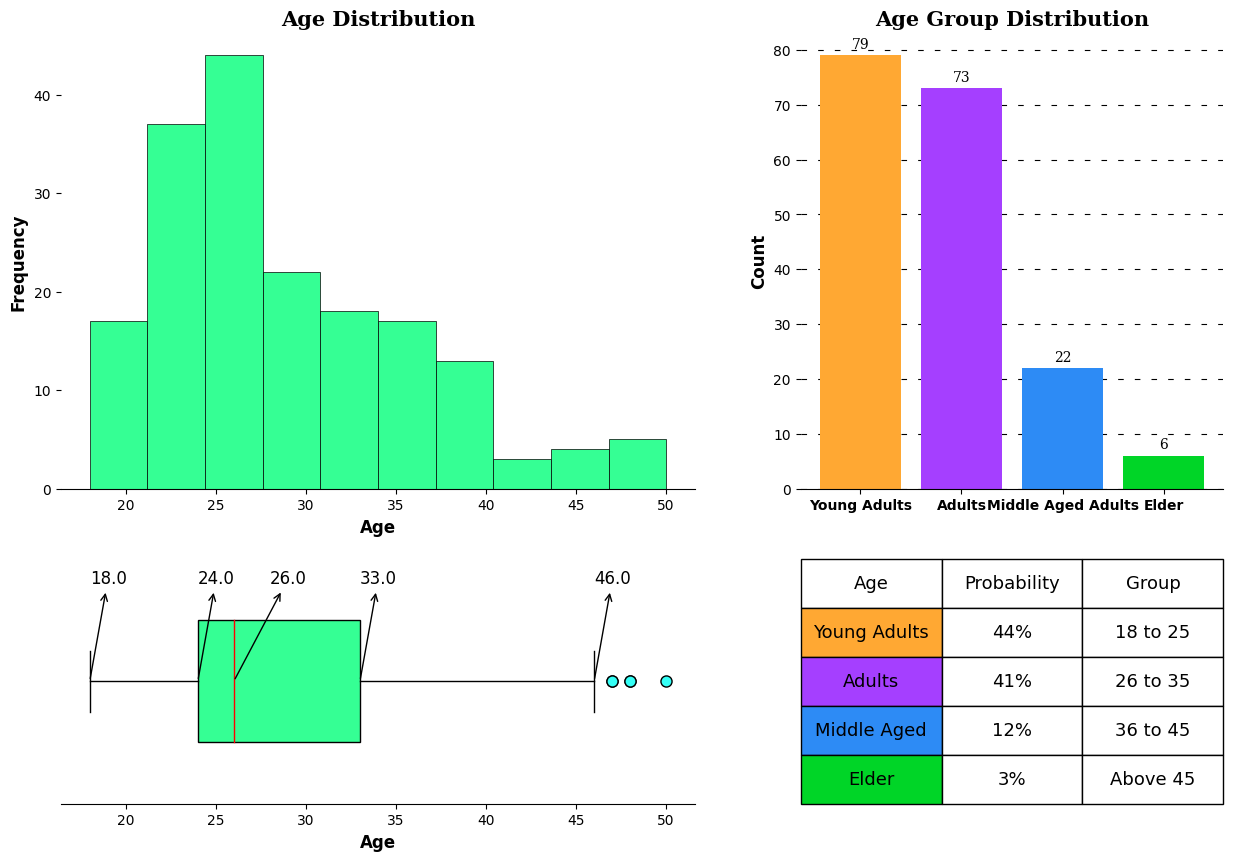

In [54]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

#age histogram
ax0 = fig.add_subplot(gs[0,0])

ax0.hist(df['Age'],color= '#35ff94',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Age',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')
ax0.set_title('Age Distribution',{'font':'serif', 'size':15,'weight':'bold'})
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)


#box plot for age
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Age'],vert = False,patch_artist = True,widths = 0.5)

boxplot['boxes'][0].set(facecolor='#35ff94')
boxplot['medians'][0].set(color='red')

#outliers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#35fff6")
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit
median = df['Age'].quantile(0.5) #getting Q2

for i,j in info:
    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
#adding the median
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median + 2,1.4),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
ax1.set_yticks([])
ax1.set_xlabel('Age',fontweight = 'bold',fontsize = 12)


#age group bar chart
ax2 = fig.add_subplot(gs[0,1])
temp = df['age_group'].value_counts()
color_map = ["#ffa833", "#a53fff",'#2d8bf5','#00d527']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#value_counts and grid lines
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticklabels(temp.index,fontweight = 'bold')
ax2.set_title('Age Group Distribution',{'font':'serif', 'size':15,'weight':'bold'})

#table for group info
ax3 = fig.add_subplot(gs[1,1])
age_info = [['Young Adults','44%','18 to 25'],['Adults','41%','26 to 35'],['Middle Aged','12%','36 to 45'],
            ['Elder','3%','Above 45']]
color_2d = [["#ffa833",'#FFFFFF','#FFFFFF'],["#a53fff",'#FFFFFF','#FFFFFF'],['#2d8bf5','#FFFFFF','#FFFFFF'],
            ['#00d527','#FFFFFF','#FFFFFF']]

table = ax3.table(cellText = age_info, cellColours=color_2d, cellLoc='center',colLabels =['Age','Probability','Group'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
table.set_fontsize(13)
ax3.axis('off')


plt.show()

**🔍Insights:**

85% of the customers fall in the age range of 18 to 35. with a median age of 26, suggesting young people showing more interest in the companies products

As we can see from the box plot, there are 3 outlier's present in the age data.

### **Customer Education Distribution**

<ipython-input-59-298f20e2bab8>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 7)


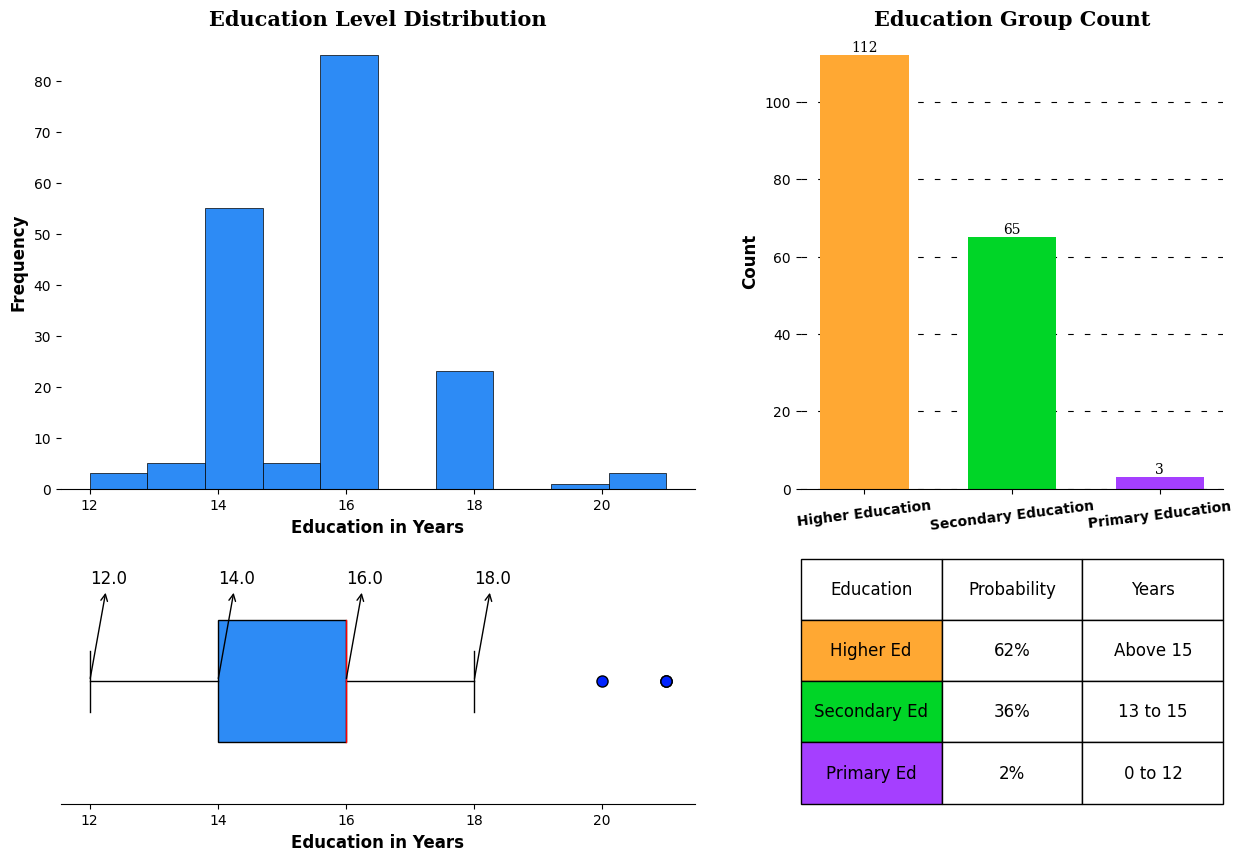

In [59]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

#education histogram
ax0 = fig.add_subplot(gs[0,0])
ax0.hist(df['Education'],color= '#2d8bf5',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Education in Years',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')
ax0.set_title('Education Level Distribution',{'font':'serif', 'size':15,'weight':'bold'})

for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)


#box plot for education
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Education'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors and median line
boxplot['boxes'][0].set(facecolor='#2d8bf5')
boxplot['medians'][0].set(color='red')

for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#0023ff")
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit
median = df['Education'].quantile(0.5) #getting Q2
for i,j in info:
    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
ax1.set_yticks([])
ax1.set_xlabel('Education in Years',fontweight = 'bold',fontsize = 12)


#education group bar chart
ax2 = fig.add_subplot(gs[0,1])
temp = df['edu_group'].value_counts()
color_map = ["#ffa833", "#00d527",'#a53fff']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2,width = 0.6)

#adding the value_counts and grid lines
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 7)
ax2.set_title('Education Group Count',{'font':'serif', 'size':15,'weight':'bold'})


#table for group info
ax3 = fig.add_subplot(gs[1,1])
edu_info = [['Higher Ed','62%','Above 15'],['Secondary Ed','36%','13 to 15'],['Primary Ed','2%','0 to 12']]
color_2d = [["#ffa833",'#FFFFFF','#FFFFFF'],["#00d527",'#FFFFFF','#FFFFFF'],['#a53fff','#FFFFFF','#FFFFFF']]

table = ax3.table(cellText = edu_info, cellColours=color_2d, cellLoc='center',colLabels =['Education','Probability','Years'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax3.axis('off')


plt.show()

**🔍Insights:**

98% of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.

As we can see from the box plot, there are 2 outlier's present in the education data.

### **Customer Income Distribution**

<ipython-input-63-4561a7020883>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 9)


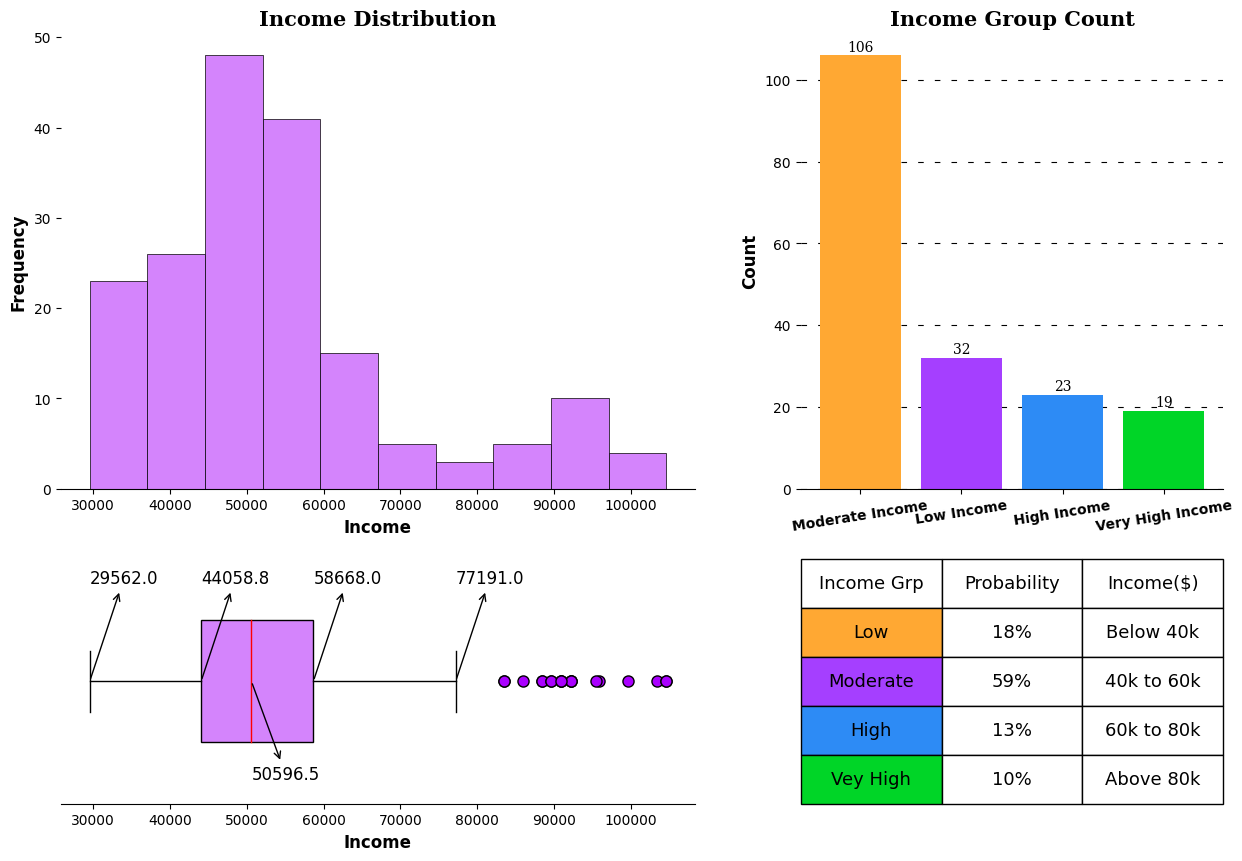

In [63]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

#Income histogram
ax0 = fig.add_subplot(gs[0,0])
ax0.hist(df['Income'],color= '#d484fc',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Income',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')
ax0.set_title('Income Distribution',{'font':'serif', 'size':15,'weight':'bold'})
#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)


#box plot for Income
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Income'],vert = False,patch_artist = True,widths = 0.5)
# Customize box and whisker colors and median line
boxplot['boxes'][0].set(facecolor='#d484fc')
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#aa00ff")
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit
median = df['Income'].quantile(0.5) #getting Q2
for i,j in info:
    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median,0.6),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
ax1.set_yticks([])
ax1.set_xlabel('Income',fontweight = 'bold',fontsize = 12)


#Income group bar chart
ax2 = fig.add_subplot(gs[0,1])
temp = df['income_group'].value_counts()
color_map = ['#ffa833', "#a53fff",'#2d8bf5','#00d527']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts and grid lines
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 9)
ax2.set_title('Income Group Count',{'font':'serif', 'size':15,'weight':'bold'})

#table group info
ax3 = fig.add_subplot(gs[1,1])
inc_info = [['Low','18%','Below 40k'],['Moderate','59%','40k to 60k'],['High','13%','60k to 80k'],
            ['Vey High','10%','Above 80k']]
color_2d = [["#ffa833",'#FFFFFF','#FFFFFF'],["#a53fff",'#FFFFFF','#FFFFFF'],['#2d8bf5','#FFFFFF','#FFFFFF'],
            ['#00d527','#FFFFFF','#FFFFFF']]

table = ax3.table(cellText = inc_info, cellColours=color_2d, cellLoc='center',
                  colLabels =['Income Grp','Probability','Income($)'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax3.axis('off')
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

plt.show()

**🔍Insights:**

Almost 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.

Surprisingly 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income group.

As we can see from the box plot, there are many outlier's present in the income data.

### **Customers Expected Weekly Mileage**

<ipython-input-64-2bc3eb3a2d16>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 9)


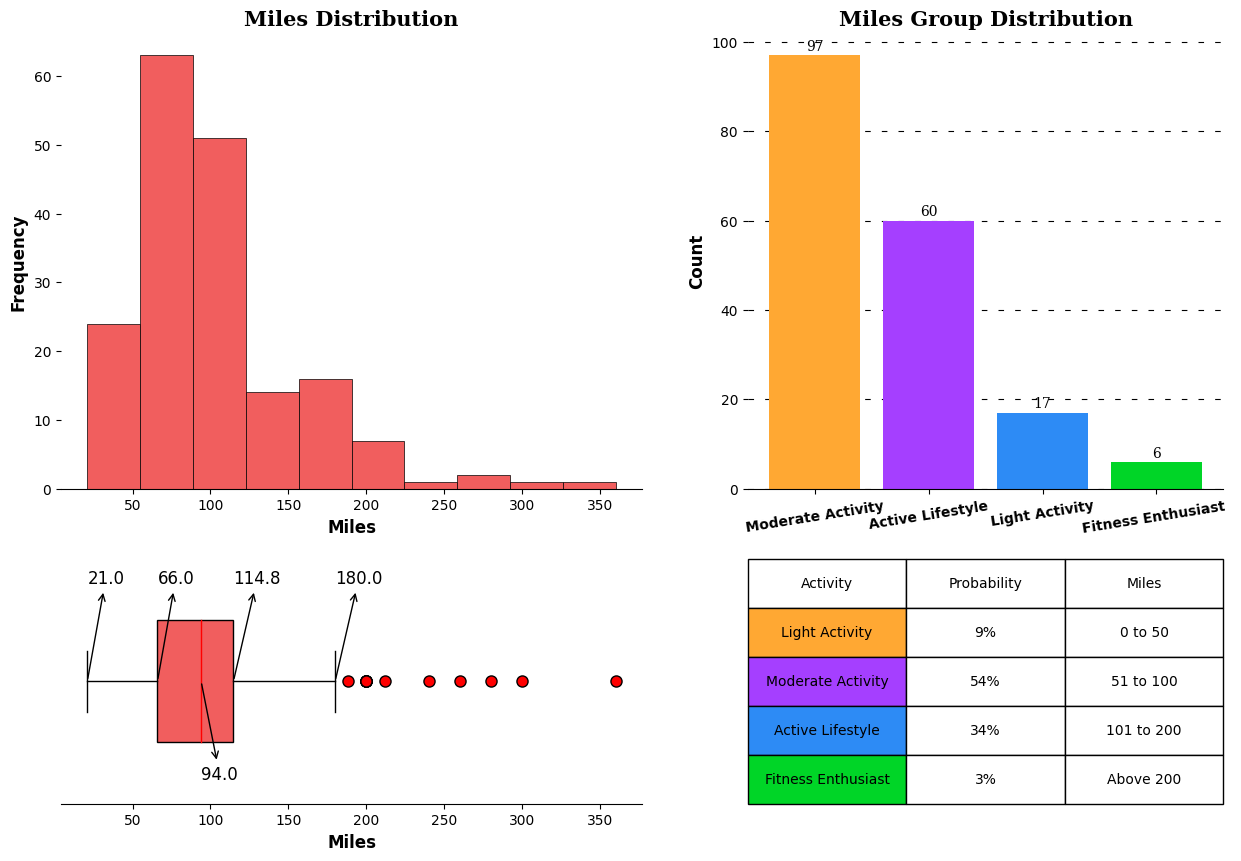

In [64]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.55,0.45])

#miles histogram
ax0 = fig.add_subplot(gs[0,0])
ax0.hist(df['Miles'],color= '#f15e5e',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Miles',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')
ax0.set_title('Miles Distribution',{'font':'serif', 'size':15,'weight':'bold'})
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#box plot for miles
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Miles'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors and median line
boxplot['boxes'][0].set(facecolor='#f15e5e')
boxplot['medians'][0].set(color='red')
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#ff0000")
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit
median = df['Miles'].quantile(0.5) #getting Q2
for i,j in info:
    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median,0.6),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

ax1.set_yticks([])
ax1.set_xlabel('Miles',fontweight = 'bold',fontsize = 12)


#Miles group bar chart
ax2 = fig.add_subplot(gs[0,1])
temp = df['miles_group'].value_counts()
color_map = ['#ffa833', "#a53fff",'#2d8bf5','#00d527']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts and grid lines
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xticklabels(temp.index,fontweight = 'bold',rotation = 9)
ax2.set_title('Miles Group Distribution',{'font':'serif', 'size':15,'weight':'bold'})


#table for group info
ax3 = fig.add_subplot(gs[1,1])
miles_info = [['Light Activity','9%','0 to 50'],['Moderate Activity','54%','51 to 100'],['Active Lifestyle','34%','101 to 200'],
            ['Fitness Enthusiast','3%','Above 200']]
color_2d = [['#ffa833','#FFFFFF','#FFFFFF'],["#a53fff",'#FFFFFF','#FFFFFF'],["#2d8bf5",'#FFFFFF','#FFFFFF'],
            ['#00d527','#FFFFFF','#FFFFFF']]
table = ax3.table(cellText = miles_info, cellColours=color_2d, cellLoc='center',colLabels =['Activity','Probability','Miles'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
table.set_fontsize(11)
ax3.axis('off')


plt.show()

**🔍Insights:**

Almost 88% of the customers plans to use the treadmill for 50 to 200 miles per week with a median of 94 miles per week.

As we can see from the box plot, there are 8 outlier's present in the miles data.

# **Visual Analysis - Bivariate**

### **Analysis of Product Type**

<ipython-input-70-7c0578026d0f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#a53fff",'#2d8bf5','#00d527'])
<ipython-input-70-7c0578026d0f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(df['Product'].unique(),fontweight = 'bold')
<ipython-input-70-7c0578026d0f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#a53fff",'#2d8bf5','#00d527'])
<ipython-input-70-7c0578026d0f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(df['Product'].unique(),fontw

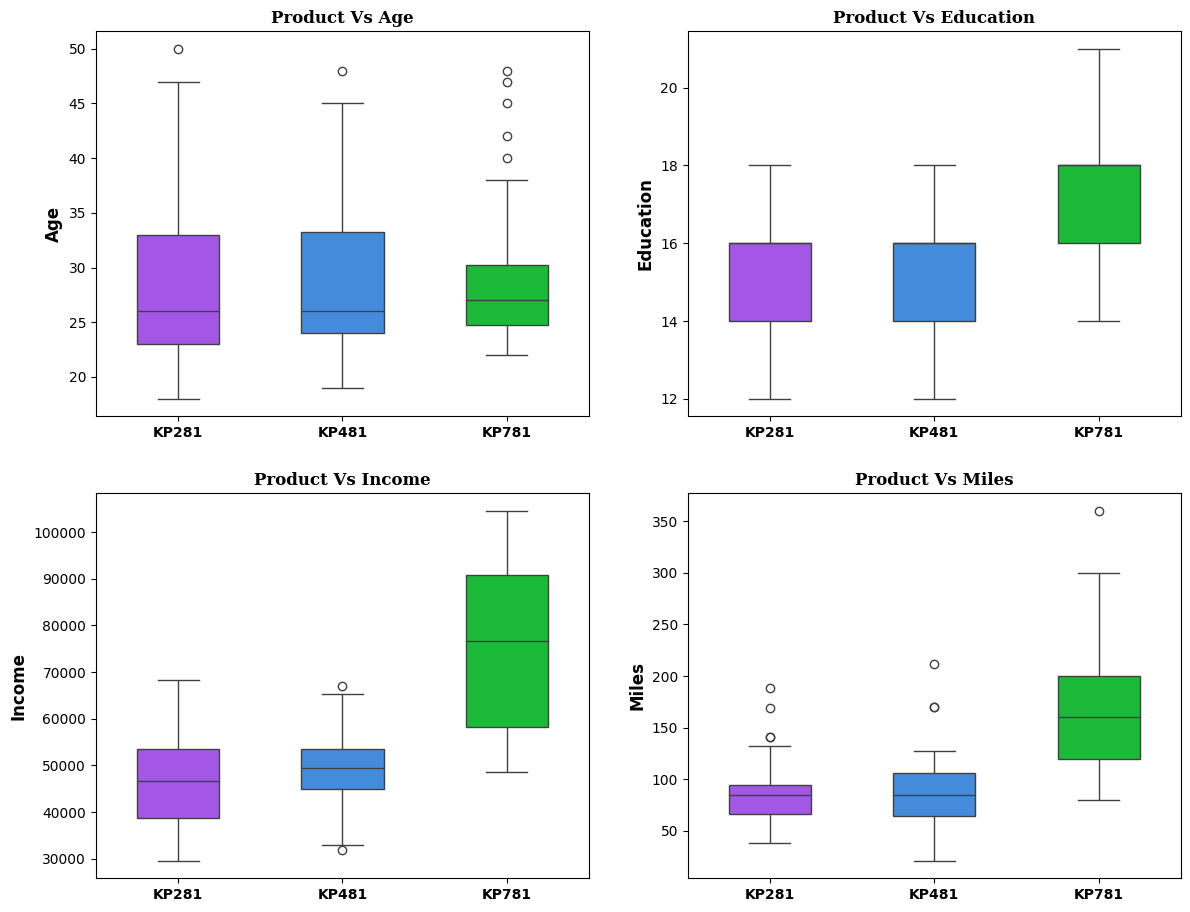

In [70]:
fig = plt.figure(figsize = (14,11))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:

    #plot position
    ax0 = fig.add_subplot(gs[i,j])

    #plot
    sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#a53fff",'#2d8bf5','#00d527'])

    #plot title
    ax0.set_title(f'Product Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df['Product'].unique(),fontweight = 'bold')
    ax0.set_ylabel(f'{k}',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')

plt.show()

**🔍Insights:**

The analysis presented above clearly indicates a strong preference for the treadmill model KP781 among customers who possess higher education, higher income levels, and intend to engage in running activities exceeding 150 miles per week.

### **Product Preferences Across Age**

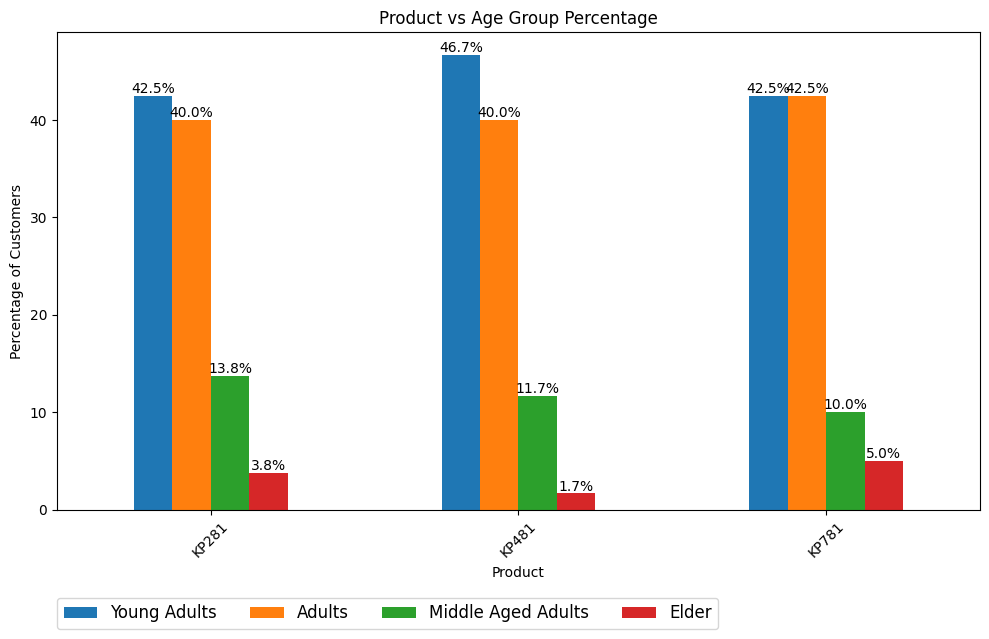

In [114]:
product_age_percentage = df.groupby(['Product', 'age_group'])['age_group'].count() \
    .unstack() \
    .apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the graph
ax = product_age_percentage.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product')
plt.ylabel('Percentage of Customers')
plt.title('Product vs Age Group Percentage')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
ax.legend(loc = (0,-0.25),ncol = 4,fontsize = 12)

plt.show()

**🔍Insights:**

* The analysis provided above distinctly demonstrates that there exists no strong correlation between age groups and product preferences. This is evident from the nearly uniform distribution of age groups across all the products.

### **Product Preferences Across Education Levels**

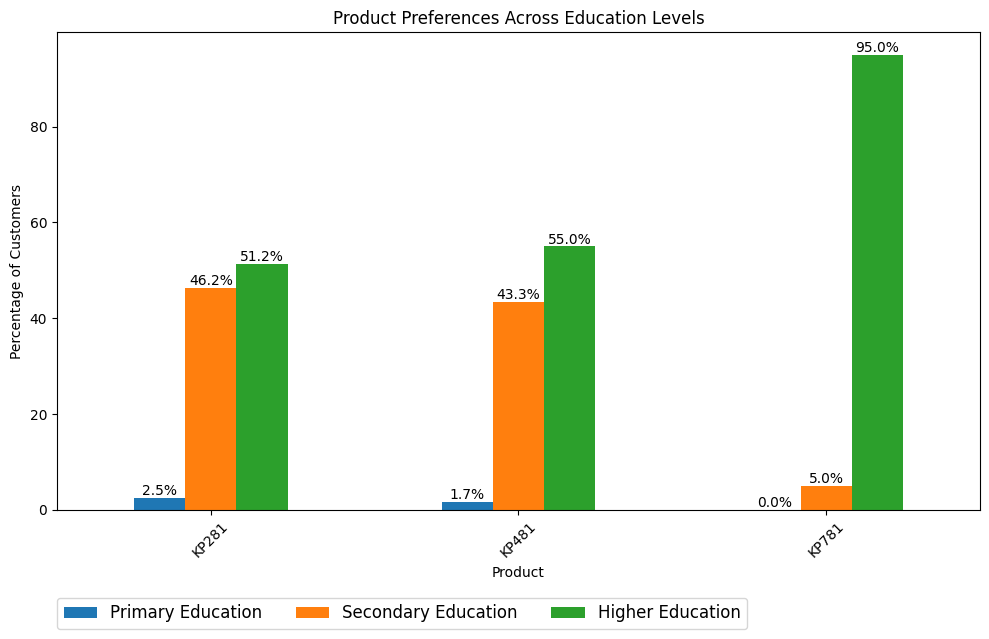

In [117]:
product_edu_percentage = df.groupby(['Product', 'edu_group'])['edu_group'].count() \
    .unstack() \
    .apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the graph
ax = product_edu_percentage.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product')
plt.ylabel('Percentage of Customers')
plt.title('Product Preferences Across Education Levels')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
ax.legend(loc = (0,-0.25),ncol = 4,fontsize = 12)

plt.show()

**🔍Insights:**

* The analysis provided above cleary demonstrates the preference of Highly Educated people for treadmill model KP781

* For treadmill models KP481 and KP281, the distribution of customer with Secondary Education and with Higher Education is almost equal

### **Product Preference Across Income Group**

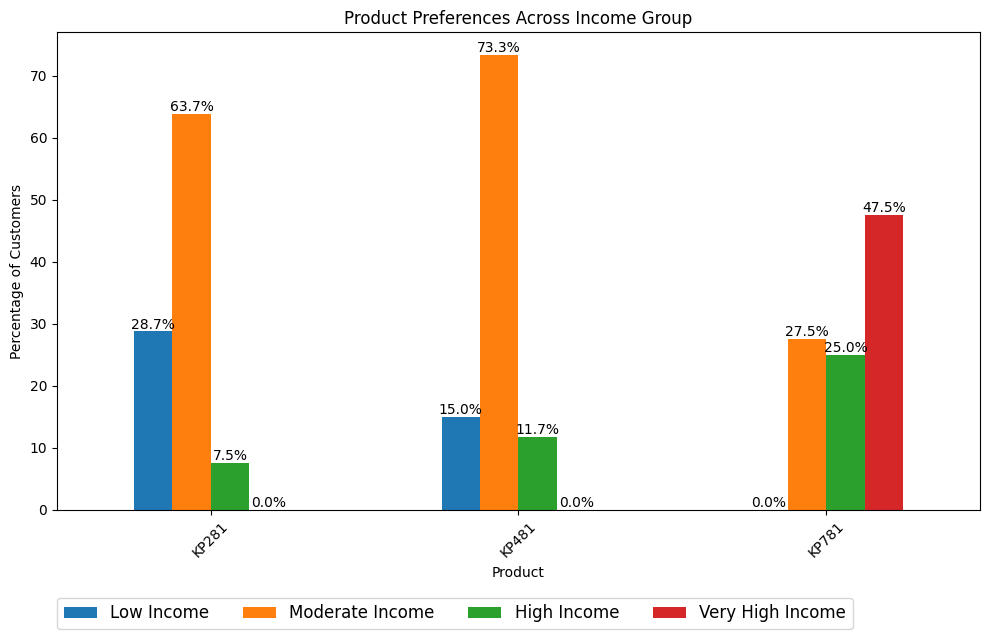

In [121]:
product_income_percentage = df.groupby(['Product', 'income_group'])['income_group'].count() \
    .unstack() \
    .apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the graph
ax = product_income_percentage.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product')
plt.ylabel('Percentage of Customers')
plt.title('Product Preferences Across Income Group')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
ax.legend(loc = (0,-0.25),ncol = 4,fontsize = 12)

plt.show()


**🔍Insights:**

* Treadmill model KP781 is preferred more by customers with Very High Income

* Both treadmill models, KP481 and KP281, are preferred more by customers with Moderate Income

### **Product preference across customer weekly mileage**

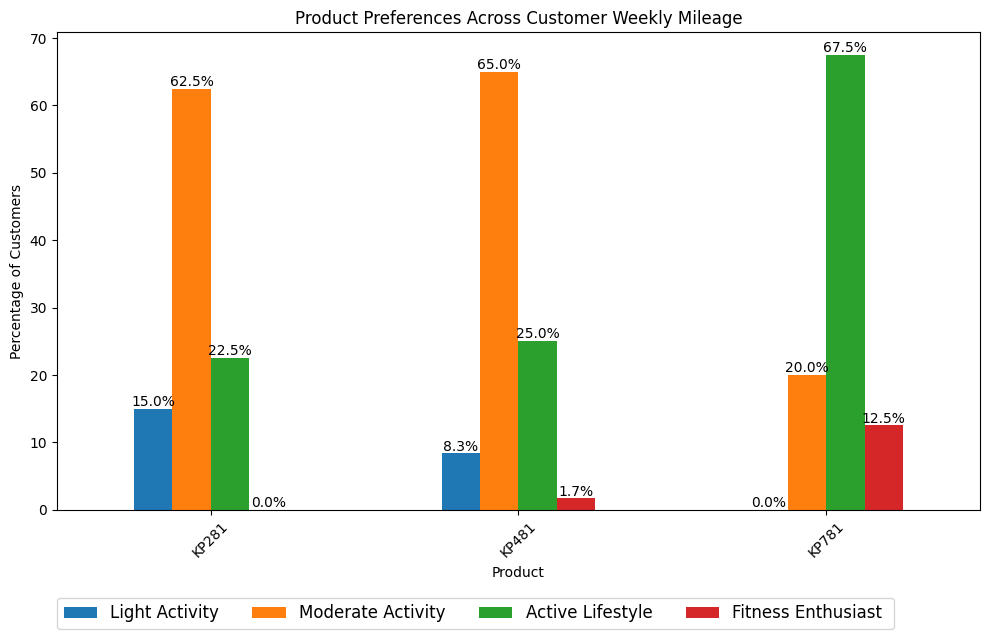

In [122]:
product_miles_percentage = df.groupby(['Product', 'miles_group'])['miles_group'].count() \
    .unstack() \
    .apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the graph
ax = product_miles_percentage.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product')
plt.ylabel('Percentage of Customers')
plt.title('Product Preferences Across Customer Weekly Mileage')
plt.xticks(rotation=45)
plt.legend(title='Weekly Mileage Group')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')
ax.legend(loc = (0,-0.25),ncol = 4,fontsize = 12)

plt.show()

**🔍Insights:**
* Treadmill model KP781 is preferred more by customers planning to run 100 to 200 miles per week

* Both treadmill models, KP481 and KP281, are preferred more by customers planning to run 50 to 100 miles per week

### **Product Preference across Gender and Marital Status**

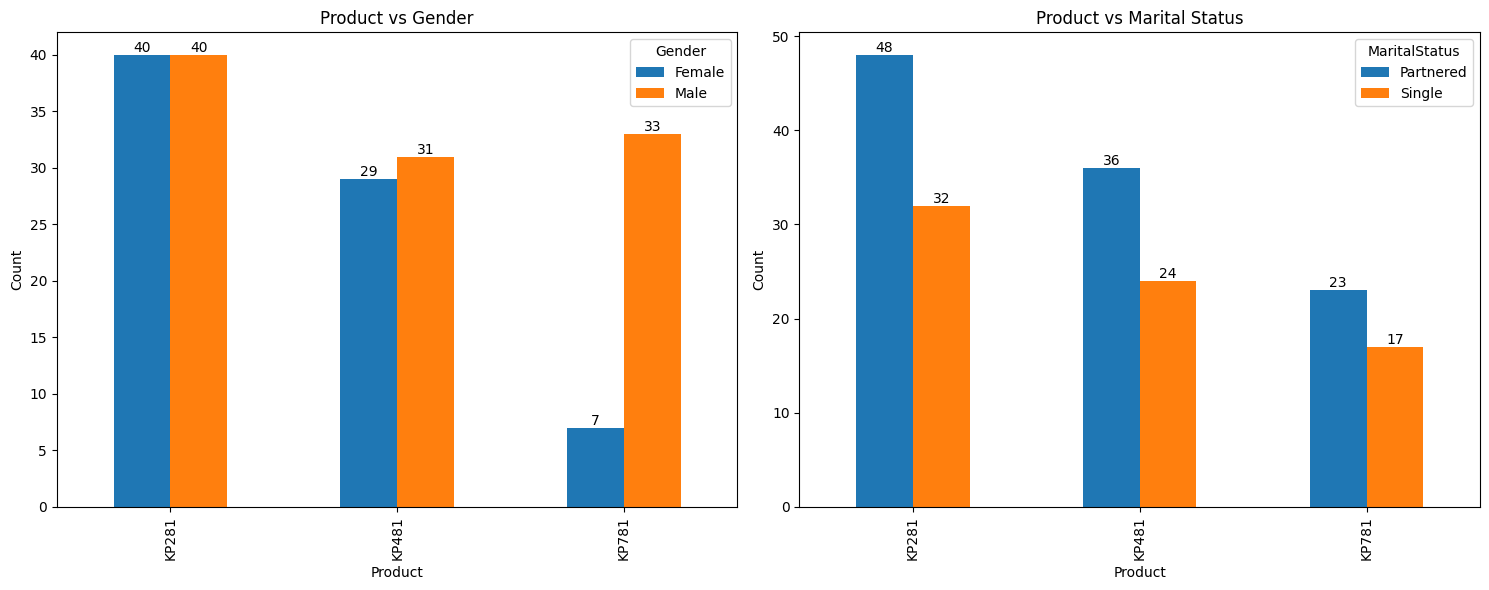

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Product vs Gender
product_gender_counts = df.groupby(['Product', 'Gender'])['Gender'].count().unstack()
product_gender_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Product vs Gender')
axes[0].set_ylabel('Count')
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge')


# Product vs Marital Status
product_marital_counts = df.groupby(['Product', 'MaritalStatus'])['MaritalStatus'].count().unstack()
product_marital_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Product vs Marital Status')
axes[1].set_ylabel('Count')
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

**🔍Insights:**
1. Gender
    * Treadmill model KP781 is preferred more by male customers.
    * Both treadmill models, KP481 and KP281, show equal distribution of both the gender.
2. Marital Status
    * For all the three treadmill models, there is uniform distribution of Married and Single customers with married customers showing slighly higher preference.

### **Gender vs Product Usage And Gender Vs Fitness**

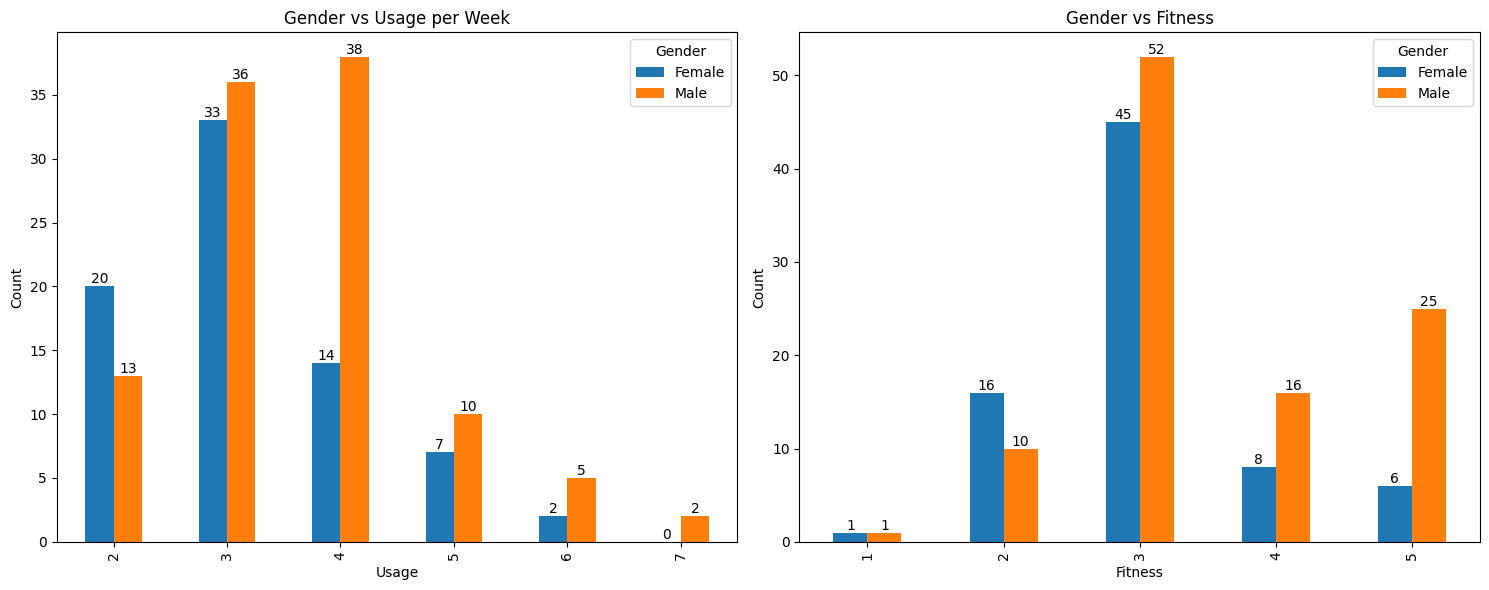

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Product vs Gender
product_gender_counts = df.groupby(['Usage','Gender'])['Gender'].count().unstack()
product_gender_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Gender vs Usage per Week')
axes[0].set_ylabel('Count')
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge')


# Product vs Marital Status
product_marital_counts = df.groupby(['Fitness','Gender'])['Gender'].count().unstack()
product_marital_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Gender vs Fitness')
axes[1].set_ylabel('Count')
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

**🔍Insights**
1. Gender Vs Usage
   * Almost 70% of Female customers plan to use the treadmill for 2 to 3 times a week whereas almost 70% of Male customer plan to use the treadmill for 3 to 4 times a week.
2. Gender Vs Fitness
   * Almost 80% of Female customers rated themselves between 2 to 3 whereas almost 90% of Male customer rated themselves between 3 to 5 on the fitness scale.

# **Correlation between Variables**

### **Pairplot**

In [134]:
df_copy = copy.deepcopy(df)

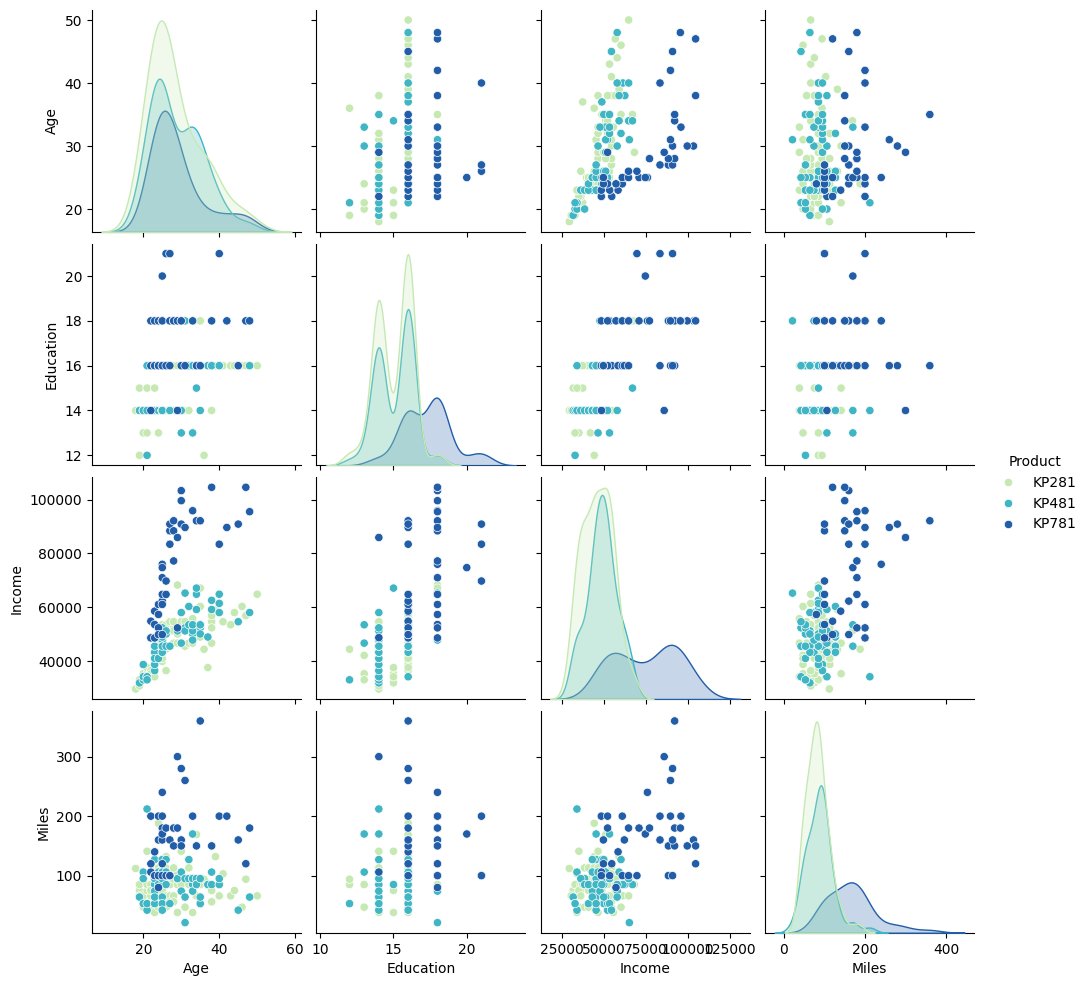

In [135]:
sns.pairplot(df_copy, hue ='Product', palette= 'YlGnBu')
plt.show()

### **Heatmap**

In [136]:
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  miles_group    180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.2+ KB


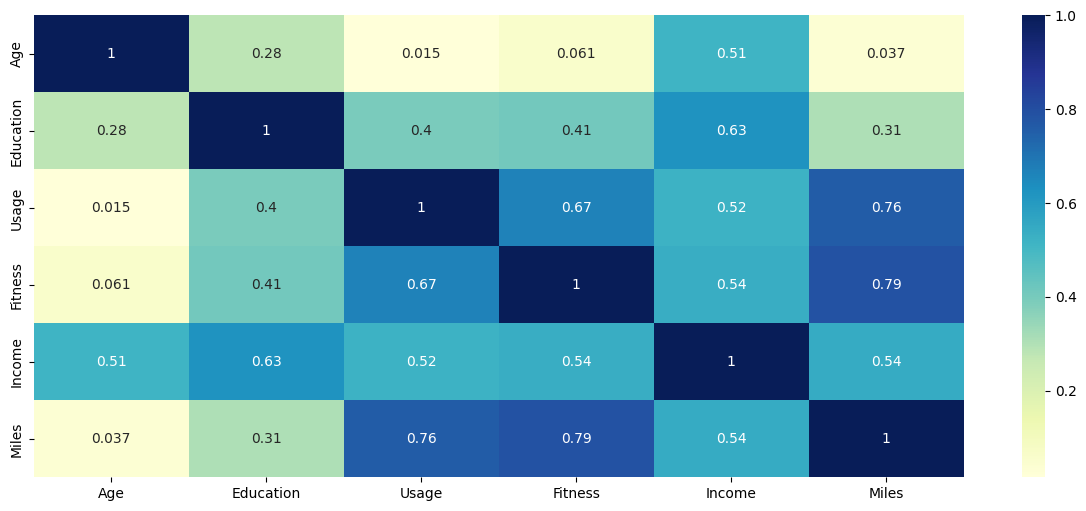

In [138]:
corr_mat = df_copy.corr(numeric_only=True)

plt.figure(figsize=(15, 6))

sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")

plt.show()

**🔍Insights:**
* From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
* Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
* Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

# **Calculating probability**

### **Probability of product purchase with respect to gender**

In [139]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a female is 42%.
  
   The conditional probability of purchasing the treadmill model given that the customer is female is
  * For Treadmill model KP281 - 22%
  * For Treadmill model KP481 - 16%
  * For Treadmill model KP781 - 4%

2. The Probability of a treadmill being purchased by a male is 58%.

  The conditional probability of purchasing the treadmill model given that the customer is male is -
    * For Treadmill model KP281 - 22%
    * For Treadmill model KP481 - 17%
    * For Treadmill model KP781 - 18%

### **Probability of product purchase with respect to age**

In [140]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

     The conditional probability of purchasing the treadmill model given that the customer is Young Adult is
    * For Treadmill model KP281 - 19%
    * For Treadmill model KP481 - 16%
    * For Treadmill model KP781 - 9%

2. The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

  The conditional probability of purchasing the treadmill model given that the customer is Adult is
    * For Treadmill model KP281 - 18%
    * For Treadmill model KP481 - 13%
    * For Treadmill model KP781 - 9%

3. The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.

4. The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

### **Probability of product purchase with respect to Education Level**

In [141]:
pd.crosstab(index =df['Product'],columns = df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

  The conditional probability of purchasing the treadmill model given that the customer has Higher Education is
    * For Treadmill model KP281 - 23%
    * For Treadmill model KP481 - 18%
    * For Treadmill model KP781 - 21%

2. The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

  The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -
    * For Treadmill model KP281 - 21%
    * For Treadmill model KP481 - 14%
    * For Treadmill model KP781 - 1%

3. The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

### **Probability of product purchase with respect to Education Income**

In [142]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

  The conditional probability of purchasing the treadmill model given that the customer has Low Income is-
  * For Treadmill model KP281 - 13%
  * For Treadmill model KP481 - 5%
  * For Treadmill model KP781 - 0%

2. The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

 The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -
  * For Treadmill model KP281 - 28%
  * For Treadmill model KP481 - 24%
  * For Treadmill model KP781 - 6%

3. The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

 The conditional probability of purchasing the treadmill model given that the customer has High Income is -
  * For Treadmill model KP281 - 3%
  * For Treadmill model KP481 - 4%
  * For Treadmill model KP781 - 6%

4. The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

 The conditional probability of purchasing the treadmill model given that the customer has High Income is -
  * For Treadmill model KP281 - 0%
  * For Treadmill model KP481 - 0%
  * For Treadmill model KP781 - 11%

### **Probability of product purchase with respect to Marital Status**

In [143]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a Married Customer is 59%.

 The conditional probability of purchasing the treadmill model given that the customer is Married is
 * For Treadmill model KP281 - 27%
 * For Treadmill model KP481 - 20%
 * For Treadmill model KP781 - 13%

2. The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

 The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -
 * For Treadmill model KP281 - 18%
 * For Treadmill model KP481 - 13%
 * For Treadmill model KP781 - 9%

### **Probability of product purchase with respect to Weekly Usage**

In [144]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

 The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -
  * For Treadmill model KP281 - 21%
  * For Treadmill model KP481 - 17%
  * For Treadmill model KP781 - 1%

2. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

 he conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -
   * For Treadmill model KP281 - 12%
  * For Treadmill model KP481 - 7%
  * For Treadmill model KP781 - 10%

3. The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

 The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -
  * For Treadmill model KP281 - 11%
  * For Treadmill model KP481 - 8%
  * For Treadmill model KP781 - 0%

### **Probability of product purchase with respect to Fitness**

In [145]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

  The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -
   * For Treadmill model KP281 - 30%
   * For Treadmill model KP481 - 22%
   * For Treadmill model KP781 - 2%

2. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

3. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

### **Probability of product purchase with respect to weekly mileage**

In [146]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


**🔍Insights:**
1. The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

 The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -
 * For Treadmill model KP281 - 7%
 * For Treadmill model KP481 - 3%
 * For Treadmill model KP781 - 0%

2. The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

 The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -
  * For Treadmill model KP281 - 28%
 * For Treadmill model KP481 - 22%
 * For Treadmill model KP781 - 4%

3. The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

 The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -
  * For Treadmill model KP281 - 10%
 * For Treadmill model KP481 - 8%
 * For Treadmill model KP781 - 15%

4. The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

# **Customer Profiling**

Based on above analysis
* Probability of purchase of KP281 = 44%
* Probability of purchase of KP481 = 33%
* Probability of purchase of KP781 = 22%

* **Customer Profile for KP281 Treadmill:**
    * Age of customer mainly between 18 to 35 years with few between 35 to 50 years
    * Education level of customer 13 years and above
    * Annual Income of customer below $60,000
    * Weekly Usage - 2 to 4 times
    * Fitness Scale - 2 to 4
    * Weekly Running Mileage - 50 to 100 miles

* **Customer Profile for KP481 Treadmill:**
    * Age of customer mainly between 18 to 35 years with few between 35 to 50 years
    * Education level of customer 13 years and above
    * Annual Income of customer between $40,000 to $80,000
    * Weekly Usage - 2 to 4 times
    * Fitness Scale - 2 to 4
    * Weekly Running Mileage - 50 to 200 miles

* **Customer Profile for KP781 Treadmill:**
    * Gender - Male
    * Age of customer between 18 to 35 years
    * Education level of customer 15 years and above
    * Annual Income of customer $80,000 and above
    * Weekly Usage - 4 to 7 times
    * Fitness Scale - 3 to 5
    * Weekly Running Mileage - 100 miles and above


# **Recommendations**

**Marketing Campaigns for KP781**
* The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.

**Affordable Pricing and Payment Plans**

* Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.

**User-Friendly App Integration**

* Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.